In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arch.data.sp500
from arch import arch_model
import seaborn as sns


Great job! 1-day 5% VaR of one million dollars means there is a 5% probability the portfolio will fall in value by 1 million dollars or MORE, not less, over a 1-day period.

In [7]:
nu

0.7864668712572018

In [15]:
bitcoin_data = pd.read_csv('./bitcoin.csv', index_col = 'Date', parse_dates = True)
basic_gm = arch_model(bitcoin_data.Return, mean = 'ar', vol = 'GARCH', p = 1, q = 1)
basic_gm_result = basic_gm.fit()
nu = basic_gm_result.params[3]
nu = 3.01
# Obtain the parametric quantile
from arch import arch_model
from arch.univariate import Normal

# Initialize GARCH model with Normal distribution
basic_gm = arch_model(bitcoin_data.Return, mean='constant', vol='GARCH', p=1, q=1, dist='normal')

basic_gm_result = basic_gm.fit()
q_parametric = basic_gm.distribution.ppf(0.05, nu)
print('5% parametric quantile: ', q_parametric)
variance_forecast = basic_gm_result.forecast(horizon = 1).variance
mean_forecast = basic_gm_result.forecast(horizon = 1).mean
# Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric
# Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['5%'], index = variance_forecast.index)

# Plot the VaR
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9279.49204238646
Iteration:      2,   Func. Count:     16,   Neg. LLF: 10101.572145991784
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4262.457413401627
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4172.677385077039
Iteration:      5,   Func. Count:     36,   Neg. LLF: 5019.81353176265
Iteration:      6,   Func. Count:     43,   Neg. LLF: 4167.577187017281
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4167.490029014055
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4167.489340910806
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4167.4893400877745
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4167.4893400877745
            Iterations: 9
            Function evaluations: 59
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 9279.49204238646
Iteration:      2,   Func. Count:     16,   Neg. LLF: 10101.572145991784


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_39196\637780404.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nu = basic_gm_result.params[3]


ValueError: parameters must have 0 elements

In [23]:
std_resid = basic_gm_result.resid / basic_gm_result.conditional_volatility
# Obtain the empirical quantile
q_empirical = std_resid.quantile(0.05)
print('5% empirical quantile: ', q_empirical)
mean_forecast = basic_gm_result.forecast(horizon = 1).mean
variance_forecast = basic_gm_result.forecast(horizon = 1).variance
q_parametric = basic_gm.distribution.ppf(0.05, nu)
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric
# Calculate the VaR
VaR_empirical = mean_forecast.values + np.sqrt(variance_forecast).values * q_empirical
# Save VaR in a DataFrame
VaR_empirical = pd.DataFrame(VaR_empirical, columns = ['5%'], index = variance_forecast.index)

# Plot the VaRs
plt.plot(VaR_empirical, color = 'brown', label = '5% Empirical VaR')
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')
plt.show()

5% empirical quantile:  -1.5458246334180263


TypeError: Normal.ppf() missing 1 required positional argument: 'pits'

In [25]:
eur_usd_data = pd.read_csv('./eur.csv', index_col = 'Date', parse_dates = True)
usd_cad_data = pd.read_csv('./eur.csv', index_col = 'Date', parse_dates = True)

Correlation:  1.0


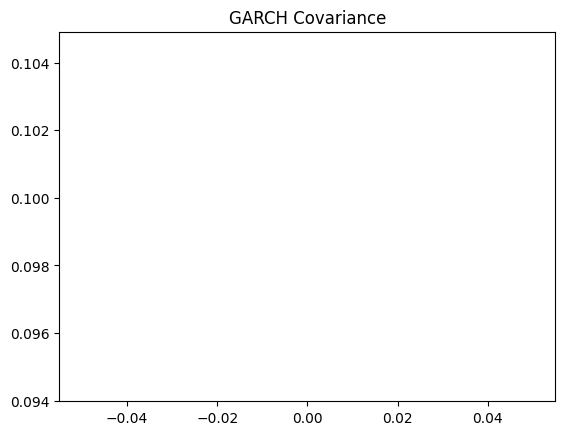

In [26]:
resid_eur = eur_usd_data.Return['2019-1-1':]
resid_cad = usd_cad_data.Return['2019-1-1':]
# Calculate correlation
corr = np.corrcoef(resid_eur, resid_cad)[0,1]
print('Correlation: ', corr)
vol_eur = np.sqrt(np.mean(resid_eur**2))
vol_cad = np.sqrt(np.mean(resid_cad**2))
# Calculate GARCH covariance
covariance =  corr * vol_eur * vol_cad

# Plot the data
plt.plot(covariance, color = 'gold')
plt.title('GARCH Covariance')
plt.show()

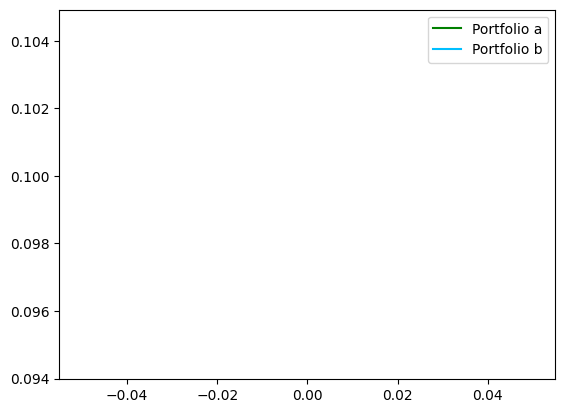

In [27]:
# Define weights
Wa1 = 0.9
Wa2 = 1 - Wa1
Wb1 = 0.5
Wb2 = 1 - Wb1
variance_eur = np.mean(resid_eur**2)
variance_cad = np.mean(resid_cad**2)
# Calculate portfolio variance
portvar_a = Wa1**2 * variance_eur + Wa2**2 * variance_cad + 2*Wa1*Wa2*covariance
portvar_b = Wb1**2 * variance_eur + Wb2**2 * variance_cad + 2*Wb1*Wb2*covariance

# Plot the data
plt.plot(portvar_a, color = 'green', label = 'Portfolio a')
plt.plot(portvar_b, color = 'deepskyblue', label = 'Portfolio b')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# Compute correlation between SP500 and Tesla
correlation = np.corrcoef(teslaGarch_resid, spGarch_resid)[0, 1]

# Compute the Beta for Tesla
stock_beta = correlation * (teslaGarch_vol / spGarch_vol)

# Plot the Beta
plt.title('Tesla Stock Beta')
plt.plot(stock_beta)
plt.show()